In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

In [171]:
FLOPS=2.15e12/28
def my_model(N, NB, Q, la=6e-6, mu=3e-10, peak_flops=FLOPS, percent=False):
    comp = (N * NB ** 2 / 6 + N * NB / 2 + N ** 2 * NB / Q + 2 * N ** 3 / 3 / Q / NB)
    comp += 2 * (N ** 2 / Q + N * NB)
    comp /= peak_flops
    
    comm = 2 * N / NB * log(Q, 2) * (la + NB ** 2 * mu / 2)
    comm += 2 * log(Q, 2) * (N * la / NB + mu * N ** 2 / Q / NB / 2)
    comm += 2 * N * la * log(2 * Q, 2) / NB
    comm += 2 * mu * (N + N ** 3 * log(Q, 2)/ (NB**2 * Q * 2))
    if percent:
        return comp + comm, comp / (comp + comm)
    else:
        return comp + comm

In [172]:
filename="new.csv"

In [173]:
data = pd.read_csv(filename, header=None)
data.columns = ["N", "NB", "P", "Q", "Time", "Gflops"]
data["grid"] = data.P * data.Q
data["flopspercore"] = data.Gflops / data.grid
data["model"] = [my_model(n, b, q) for n, b ,q in zip(data.N, data.NB, data.P)]
data["ratio"] = data.Time/data.model
data = data.sort_values(by="N")

In [174]:
data

,N,NB,P,Q,Time,Gflops,grid,flopspercore,model,ratio
17,1000,10,1,1,0.02,26.7280,1,26.728000,0.002226,8.986184
15,1000,100,1,1,0.02,35.6530,1,35.653000,0.001561,12.814311
16,1000,1,1,1,0.14,4.7728,1,4.772800,0.020722,6.756145
18,2000,100,1,1,0.13,42.1310,1,42.131000,0.006299,20.637592
19,2000,1,1,1,1.11,4.8298,1,4.829800,0.093615,11.857085
20,2000,10,1,1,0.18,29.9710,1,29.971000,0.009973,18.048482
53,5000,96,5,5,0.22,381.6900,25,15.267600,0.016000,13.750115
54,5000,80,5,5,0.22,380.7100,25,15.228400,0.017156,12.823719
47,5000,128,4,4,0.29,291.5100,16,18.219375,0.017742,16.345699
65,5000,32,1,1,2.14,38.9730,1,38.973000,0.046879,45.649615


In [175]:
g = 25
nb = 100
n = 10000

In [194]:
data_nb_g = data[data.grid==g][data.NB==nb].iloc[:, :]
data_nb_n = data[data.N==n][data.NB==nb].iloc[:, :]
data_n_g = data[data.N==n][data.grid==g].iloc[:, :]
data_use = data_nb_n

/nv/coc-ice/tisaac3/opt/pace-ice/nv/usr-local-rhel6.7/pacerepov1/python/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/nv/coc-ice/tisaac3/opt/pace-ice/nv/usr-local-rhel6.7/pacerepov1/python/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/nv/coc-ice/tisaac3/opt/pace-ice/nv/usr-local-rhel6.7/pacerepov1/python/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [198]:
data_use = data_use.sort_values(by="NB").loc[list(range(78, 84)), :]
data_use

,N,NB,P,Q,Time,Gflops,grid,flopspercore,model,ratio
78,10000,100,1,1,34.93,19.089,1,19.089000,0.221115,157.972434
79,10000,100,2,2,10.06,66.284,4,16.571000,0.130335,77.185672
80,10000,100,3,3,4.85,137.550,9,15.283333,0.096865,50.069826
81,10000,100,4,4,3.06,217.900,16,13.618750,0.079320,38.577746
82,10000,100,5,5,2.35,283.980,25,11.359200,0.068514,34.299660
83,10000,100,4,7,2.12,314.160,28,11.220000,0.079320,26.727066


In [ ]:
ax = plt.subplot(111)
ax.plot(data_use.N, [log(i) for i in data_use.Time], label="actual")
ax.plot(data_use.N, [log(i) for i in data_use.model], label="predicted")
# ax.plot(data_use.N, data_use.Time, label="actual")
# ax.plot(data_use.N, data_use.model, label="predicted")
plt.legend()
plt.title("N vs Time with np=%d, nb=%d"%(g, nb))
plt.ylabel("Log of Time")
plt.xlabel("N")
plt.savefig("N_T_%d_%d.png"%(g, nb))

In [ ]:
plt.plot(data_use.N, data_use.flopspercore)
plt.title("N vs flops/core with np=%d, nb=%d"%(g, nb))
plt.ylabel("Gflops/core")
plt.xlabel("N")
plt.savefig("N_flops_%d_%d.png"%(g, nb))

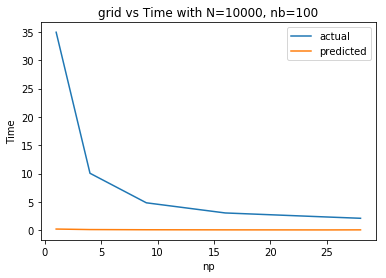

In [201]:
ax = plt.subplot(111)
# ax.plot(data_use.grid, [log(i) for i in data_use.Time], label="actual")
# ax.plot(data_use.grid, [log(i) for i in data_use.model], label="predicted")
ax.plot(data_use.grid, data_use.Time, label="actual")
ax.plot(data_use.grid, data_use.model, label="predicted")
plt.legend()
plt.title("grid vs Time with N=%d, nb=%d"%(n, nb))
plt.ylabel("Time")
plt.xlabel("np")
plt.savefig("grid_T_%d_%d_log.png"%(n, nb))

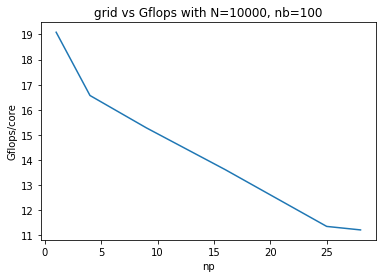

In [202]:
plt.plot(data_use.grid, data_use.flopspercore)
plt.ylabel("Gflops/core")
plt.xlabel("np")
plt.title("grid vs Gflops with N=%d, nb=%d"%(n, nb))
plt.savefig("grid_flops_%d_%d.png"%(g, nb))

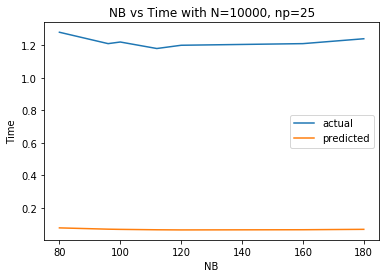

In [192]:
ax = plt.subplot(111)
# ax.plot(data_use.NB, [log(i) for i in data_use.Time], label="actual")
# ax.plot(data_use.NB, [log(i) for i in data_use.model], label="predicted")
ax.plot(data_use.NB, data_use.Time, label="actual")
ax.plot(data_use.NB, data_use.model, label="predicted")
plt.legend()
plt.title("NB vs Time with N=%d, np=%d"%(n, g))
plt.ylabel("Time")
plt.xlabel("NB")
plt.savefig("NB_T_%d_%d.png"%(n, g))

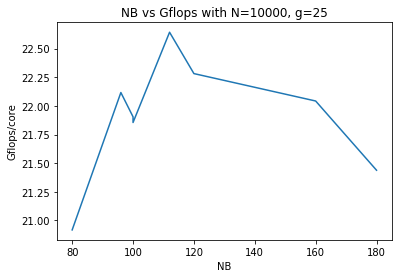

In [191]:
plt.plot(data_use.NB, data_use.flopspercore)
plt.ylabel("Gflops/core")
plt.xlabel("NB")
plt.title("NB vs Gflops with N=%d, g=%d"%(n, g))
plt.savefig("NB_flops_%d_%d.png"%(n, g))

In [ ]:
|